In [157]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
%matplotlib inline

In [158]:
def get_iris_data():
    iris_data = load_iris()
    iris_df = pd.DataFrame(iris_data.data, columns = iris_data.feature_names)
    return iris_df

In [159]:
iris_data = get_iris_data()

In [160]:
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Analys of datasets

In [161]:
n_of_datapoints= len(iris_data)
print("Number of datapoints in the iris datasets are: ", n_of_datapoints)

Number of datapoints in the iris datasets are:  150


Text(0, 0.5, 'Antal')

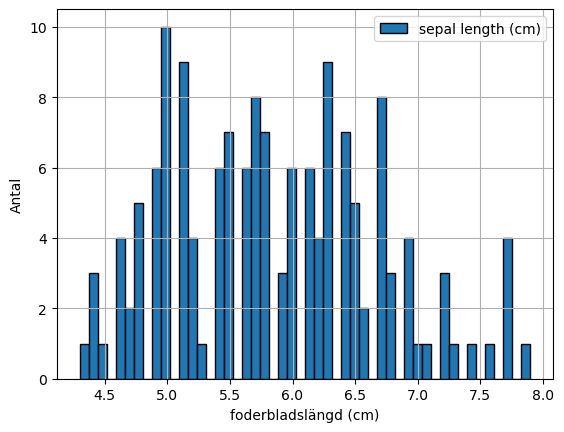

In [162]:
iris_data['sepal length (cm)'].hist(legend=True, bins = 50, ec = 'black')
plt.xlabel('foderbladslängd (cm)')
plt.ylabel('Antal')

Text(0, 0.5, 'Antal')

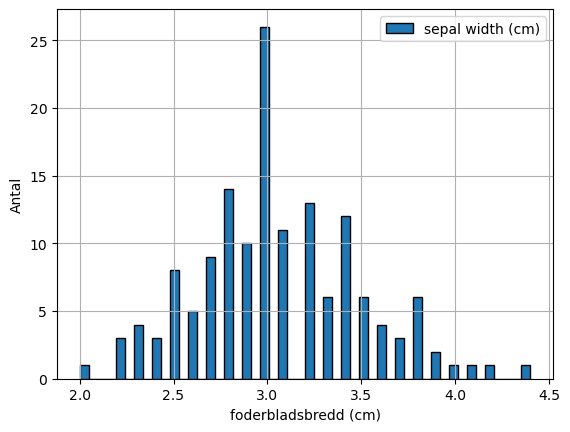

In [163]:
iris_data['sepal width (cm)'].hist(legend = True, bins = 50, ec = 'black')
plt.xlabel('foderbladsbredd (cm)')
plt.ylabel('Antal')

Text(0, 0.5, 'Antal')

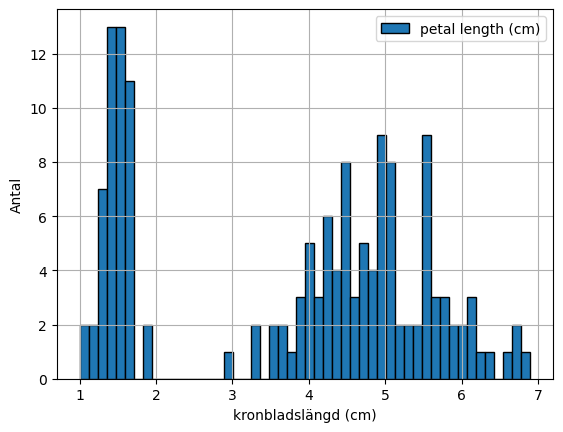

In [164]:
iris_data['petal length (cm)'].hist(legend = True, ec ='black', bins = 50)
plt.xlabel('kronbladslängd (cm)')
plt.ylabel('Antal')

Text(0, 0.5, 'Antal')

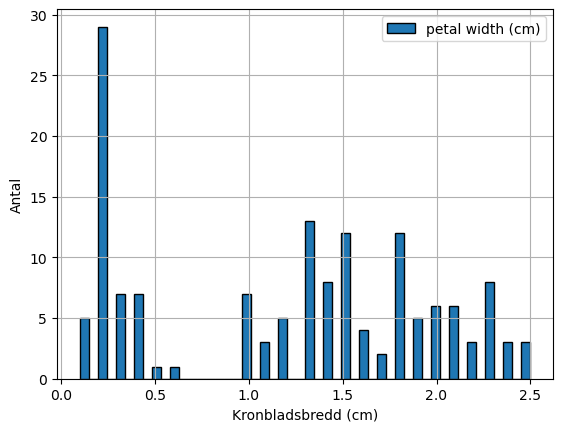

In [173]:
iris_data['petal width (cm)'].hist(legend = True, ec = 'black', bins = 50)
plt.xlabel('Kronbladsbredd (cm)')
plt.ylabel('Antal')

### Histogrammen öven visar hur datapunkterna är fördelade över de olika attributen. Man kan se att sepal length och sepal width har ungefär normalfördelning medan petal length och petal width är mer snedfördelade.

# KMeans algoritm:
### K-means-algoritmen identifierar ett visst antal centroider inom en datamängd, en centroid är det aritmetiska medelvärdet av alla datapunkter som tillhör en särskild kluster. Algoritmen tilldelar sedan varje datapunkt till det närmaste klustret när den försöker hålla klustren så små som möjligt (K-means 'medelvärden' hänvisar till uppgiften att ta medelvärdet av data eller hitta centroiden). Samtidigt försöker K-means att hålla de andra klustren så olika som möjligt.

## sepal length VS sepal width

Text(0, 0.5, 'sepal width')

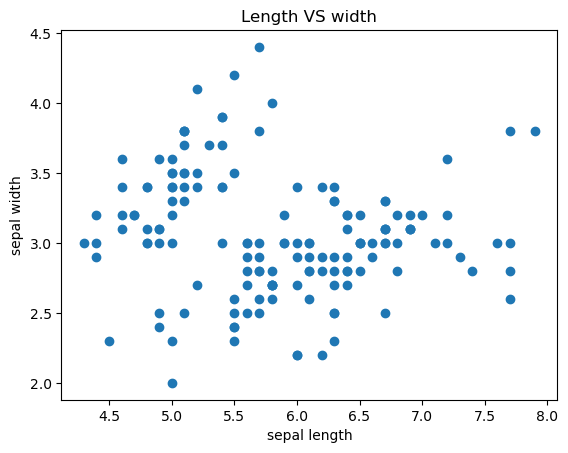

In [326]:
plt.scatter(iris_data['sepal length (cm)'], iris_data['sepal width (cm)'])
plt.title ("Length VS width")
plt.xlabel('sepal length')
plt.ylabel('sepal width')

In [368]:
kmeans = KMeans(n_clusters = 4, max_iter = 100)

In [369]:
cluster_df1 =iris_data[['sepal length (cm)', 'sepal width (cm)']]

In [370]:
kmeans.fit(cluster_df1)

/Users/yari/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=100, n_clusters=4)

In [371]:
kmeans.cluster_centers_

array([[6.8804878 , 3.09756098],
       [5.9245283 , 2.7509434 ],
       [5.22068966, 3.66551724],
       [4.77777778, 2.94444444]])

In [372]:
kmeans.predict(cluster_df1)

array([2, 3, 3, 3, 2, 2, 3, 2, 3, 3, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 3, 2, 2, 2, 3, 3, 2, 2, 2, 3, 3, 2, 2, 3, 2, 2, 3, 3, 2,
       2, 3, 2, 3, 2, 3, 0, 0, 0, 1, 0, 1, 0, 3, 0, 3, 3, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 0, 1, 0, 1, 0, 0, 3, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1], dtype=int32)

In [373]:
cluster_df1['Sepal Cluster'] = kmeans.predict(cluster_df1)# vi lägger till det ny colum i vår dataframe

/var/folders/dx/g8pn_s113csglsn8llvrhjjr0000gn/T/ipykernel_39228/1224853723.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df1['Sepal Cluster'] = kmeans.predict(cluster_df1)# vi lägger till det ny colum i vår dataframe


In [374]:
cluster_df1.head()

,sepal length (cm),sepal width (cm),Sepal Cluster
0,5.1,3.5,2
1,4.9,3.0,3
2,4.7,3.2,3
3,4.6,3.1,3
4,5.0,3.6,2


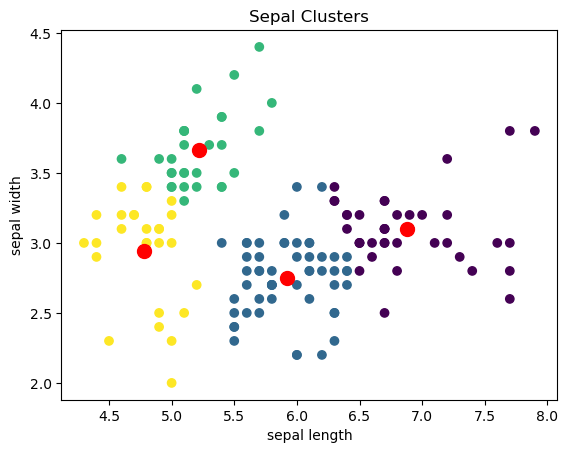

In [375]:
plt.scatter(cluster_df1['sepal length (cm)'], cluster_df1['sepal width (cm)'], c= cluster_df1['Sepal Cluster'])
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s= 100, c= 'red')
plt.title('Sepal Clusters')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

## petal length vs petal width

Text(0, 0.5, 'pepal width')

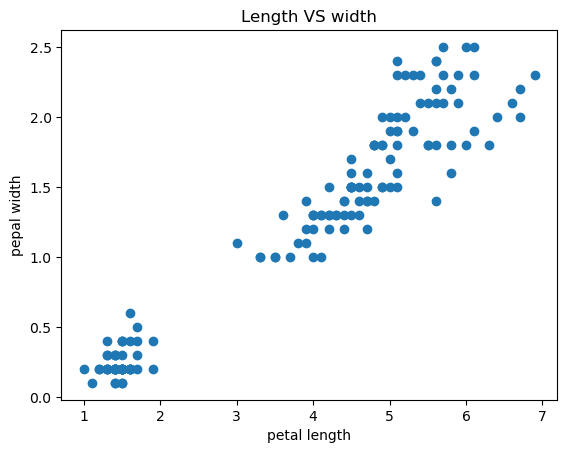

In [338]:
plt.scatter(iris_data['petal length (cm)'], iris_data['petal width (cm)'])
plt.title ("Length VS width")
plt.xlabel('petal length')
plt.ylabel('pepal width')

In [363]:
cluster_df2= iris_data[['petal length (cm)', 'petal width (cm)']]

In [364]:
kmeans.fit(cluster_df2)

/Users/yari/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=100, n_clusters=3)

In [365]:
kmeans.cluster_centers_

array([[1.462     , 0.246     ],
       [5.59583333, 2.0375    ],
       [4.26923077, 1.34230769]])

In [366]:
cluster_df2['petal cluster'] = kmeans.predict(cluster_df2)# vi lägger till det ny colum i vår dataframe

/var/folders/dx/g8pn_s113csglsn8llvrhjjr0000gn/T/ipykernel_39228/914427445.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df2['petal cluster'] = kmeans.predict(cluster_df2)# vi lägger till det ny colum i vår dataframe


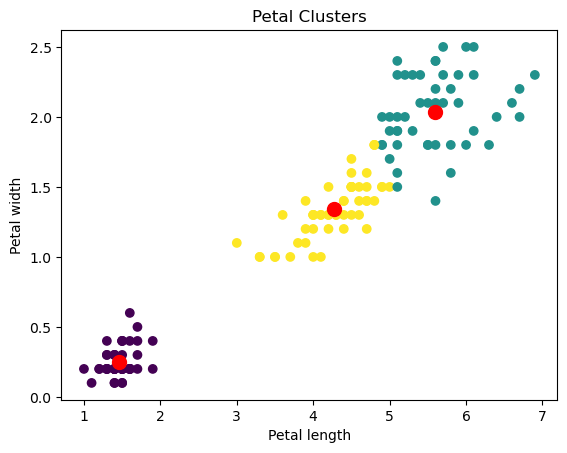

In [367]:
plt.scatter(cluster_df2['petal length (cm)'], cluster_df2['petal width (cm)'], c= cluster_df2['petal cluster'])
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s= 100, c= 'red')
plt.title('Petal Clusters')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.show()

In [2]:
datasets = pd.read_csv('/Users/yari/2023/ML/special_iris.csv')

In [8]:
n_of_datapoints= len(datasets)

In [9]:
print("Number of datapoints in the iris datasets are: ", n_of_datapoints)

Number of datapoints in the iris datasets are:  1500000


In [57]:
cluster_df = datasets[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]

In [58]:
cluster_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Analys of datasets VG

Text(0, 0.5, 'Antal')

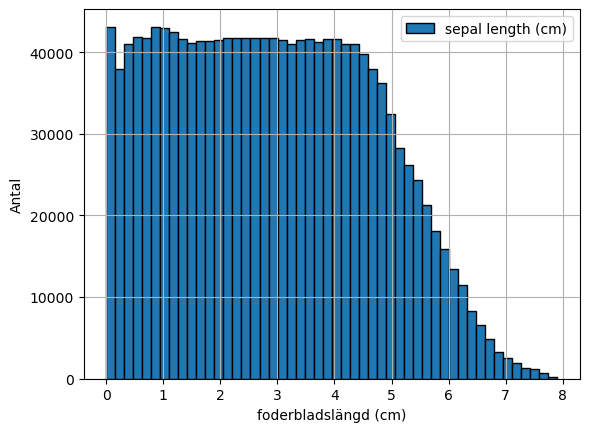

In [71]:
cluster_df['sepal length (cm)'].hist(legend=True, bins = 50, ec = 'black')
plt.xlabel('foderbladslängd (cm)')
plt.ylabel('Antal')

Text(0, 0.5, 'Antal')

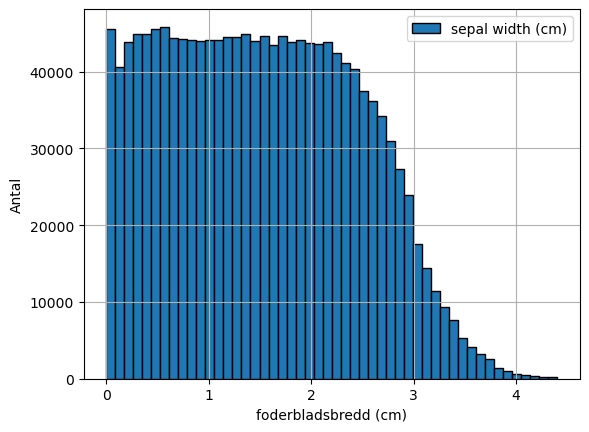

In [72]:
cluster_df['sepal width (cm)'].hist(legend = True, bins = 50, ec = 'black')
plt.xlabel('foderbladsbredd (cm)')
plt.ylabel('Antal')

Text(0, 0.5, 'Antal')

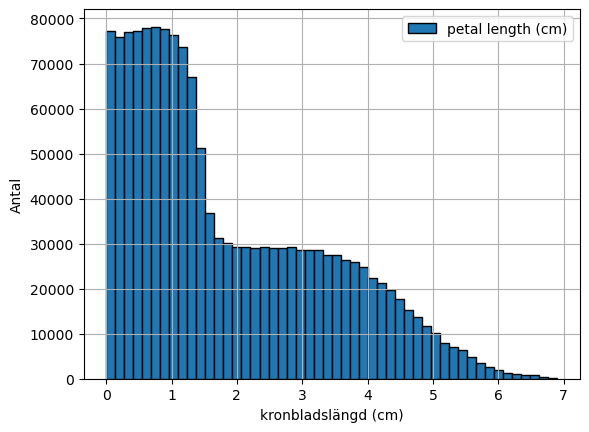

In [78]:
cluster_df['petal length (cm)'].hist(legend = True, ec ='black', bins = 50)
plt.xlabel('kronbladslängd (cm)')
plt.ylabel('Antal')

Text(0, 0.5, 'Antal')

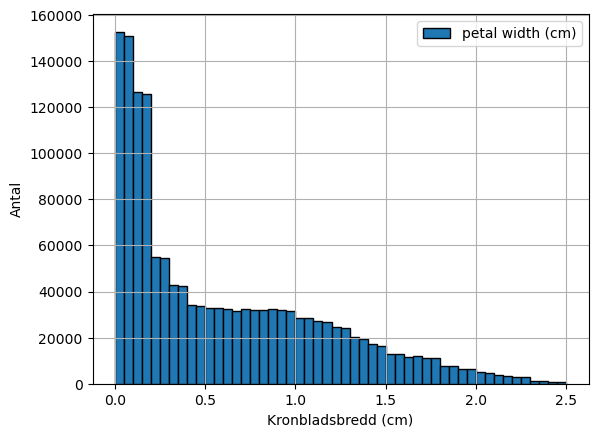

In [77]:
cluster_df['petal width (cm)'].hist(legend = True, ec = 'black', bins = 50)
plt.xlabel('Kronbladsbredd (cm)')
plt.ylabel('Antal')

In [52]:
x = datasets['petal length (cm)']
y = datasets['petal width (cm)']
z = np.array(list(zip(x, y)))

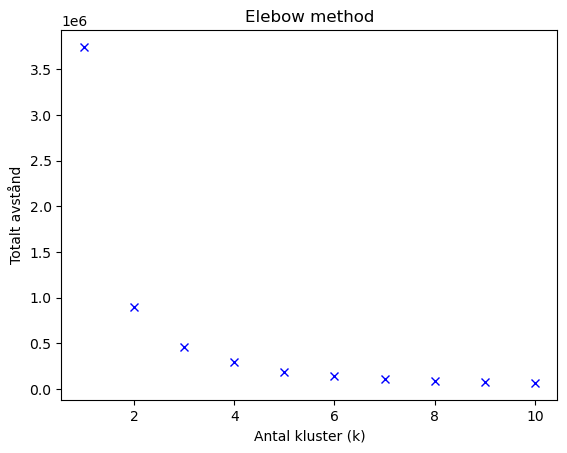

In [56]:
dist = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters = k, n_init = 10)
    kmeans.fit(X)
    dist.append(kmeans.inertia_)
plt.plot(K, dist, 'bx')
plt.xlabel('Antal kluster (k)')
plt.ylabel('Totalt avstånd')
plt.title('Elebow method')
plt.show()